In [ ]:
Direct_Detection = True
if Direct_Detection:
    detection_weights_path = "/content/drive/MyDrive/MaskWeights/V37/mask-3CW-s320-vm7.pth"#custom path

# MaskRCNN Microcontroller Detection

In [ ]:
import os
import shutil

In [ ]:
# Deletion of any non empty folder

#import shutil
#shutil.rmtree('/content/results') # put the path you want to delete

# Set initial path

%cd /content

/content


In [ ]:
running_on_vm = True
#false --> running on colab
#true  --> running on vm

In [ ]:
delete_previous_data_set = True
# in case of running on vm
  #false --> keep previous dataset that was downloaded from robowflow
  #true  --> delete previous dataset

In [ ]:
code_exists_on_vm = False
# in case of running on vm
  #false --> dont download the code or modify it from github
  #true  --> download code from github modify it

## Basic Configurations

In [ ]:
!nvidia-smi

Fri Feb 28 15:11:13 2025       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    35W /  70W |   4048MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
if Direct_Detection:
    Training_epochs = 0
else:
    Training_epochs = 2

Confidence_Threshold = .4   # set for detection  # Th. for Detection and tarining don't have to be the same value.

In [ ]:
# set no. of classes value
#class_names = ['pistol']
#class_names = ['Gun' , 'LongGun']
class_names = ['Gun', 'LongGun'  , 'PartialGun']
#class_names = ['Gun' , 'LongGun' , 'NotGun' , 'PartialGun']
number_of_classes = len(class_names)
print(number_of_classes)

3


In [ ]:
#SAVE EVERY NUMBER OF EPOCHS
save_per_num_of_epochs = 0

In [ ]:
mainfolderpath=''

if running_on_vm:
  mainfolderpath='/content/MaskRCNN'
else:
  mainfolderpath='/content'

%cd $mainfolderpath

/content/MaskRCNN


In [ ]:
if running_on_vm and (not code_exists_on_vm):
    shutil.rmtree(mainfolderpath)
    os.makedirs(mainfolderpath)
    delete_previous_data_set = True
    %cd $mainfolderpath

/content/MaskRCNN


In [ ]:
#MOUNT GOOGLE DRIVE
if not running_on_vm:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)

## Installation

In [ ]:
!pip install torch==1.13.1+cu117 torchvision==0.14.1+cu117 --extra-index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu117


In [ ]:


# #GET THE MODEL FROM GITHUB
# #!git clone https://github.com/MohamedAazizfcb/Mask_RCNN
# #%cd Mask_RCNN

# if not running_on_vm or (running_on_vm and not code_exists_on_vm):
#   try:
#         shutil.rmtree(mainfolderpath + '/Mask_RCNN')
#   except:
#         No_Error = 0
#   #!git clone https://github.com/Ahbassetsh/Mask-RCNN-TF2
#   #!git clone https://github.com/tomgross/Mask_RCNN.git --branch tensorflow-2.0
#   #!git clone https://github.com/MohamedAazizfcb/Mask_RCNN.git --branch tensorflow-2.01


# #%cd Mask-RCNN-TF2
# %cd Mask_RCNN


In [ ]:
#%%shell
#pip install cython
# Install pycocotools, the version by default in Colab
# has a bug fixed in https://github.com/cocodataset/cocoapi/pull/354
#pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

In [ ]:
#INSTALL REQUIREMENTS
#!pip install --upgrade pip
#!pip3 install -r requirements.txt
#!python3 setup.py install
#!pip install -U scikit-image==0.16.2
#!pip install -e .


## Imports

In [ ]:
import warnings;
warnings.filterwarnings('ignore');

In [ ]:
#ESSENTIAL IMPORTS
import sys
import random
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import xml.etree.ElementTree as ET
import numpy as np
import os
import shutil
from PIL import Image
import numpy as np

## Dataset

In [ ]:
import shutil
%cd $mainfolderpath

if running_on_vm and delete_previous_data_set:
    try:
        shutil.rmtree('train')
        shutil.rmtree('test')
        shutil.rmtree('valid')
        os.remove('README.dataset.txt')
        os.remove('README.roboflow.txt')
        os.remove('data.yaml')
    except:
        No_Error = 0

/content/MaskRCNN


In [ ]:
#GET IMAGES FROM ROBOFLOW
import os
#Dataset 1 class:
if (not running_on_vm) or (running_on_vm and delete_previous_data_set):
      #Dataset 1 class:
      if number_of_classes ==1:
        #DS1 - 0 Original
        #!curl -L "https://app.roboflow.com/ds/nSFLwhn4QV?key=QDdzYlemJC" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
        #DS1 - 1 Augm
        #!curl -L "https://app.roboflow.com/ds/MxAnGY0ter?key=gNxSDk4mUk" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
        #DS1 - 2 Augm Blur
        #!curl -L "https://app.roboflow.com/ds/VmiZ7bDvUR?key=jj1RXuNqvF" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
        #DS1 - 3 Augm Noise
        #!curl -L "https://app.roboflow.com/ds/wA8YYROPyj?key=HHX9D38dx8" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

        #DS2 - 0 Original
        #!curl -L "https://app.roboflow.com/ds/U5zTGlZb9Z?key=fjR8JtsqV8" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
        #DS2 - 1 Augm
        #!curl -L "https://app.roboflow.com/ds/Gliq6ddEIw?key=AuaKFRUh48" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
        #DS2 - 2 Augm Blur
        #!curl -L "https://app.roboflow.com/ds/9kQ1P999qw?key=YZoTbcO4uE" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
        #DS2 - 3 Augm Noise
        #!curl -L "https://app.roboflow.com/ds/fDiAx2R0Zd?key=YjeQdwAMnk" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

        #DSW1 - 0 Original [2020]-2 images new-2389 instances
        !curl -L "https://app.roboflow.com/ds/Uy0p7zqv8c?key=zSXEovmzIQ" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
        #DSW1 - 1 [2020]-2 images >> Augm [3419] new-2389 instances
        #!curl -L "https://app.roboflow.com/ds/sWCBYLLnUE?key=zXqTqyrpG8" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
        #DSW1 - 1 [2020]-2 images >> bbxAugm [3419] new-2389 instances
        #!curl -L "https://app.roboflow.com/ds/GVXSD99p4v?key=AdKIruCvMB" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

        #DSW1 - 0 Original [2020] images new-2380 instances
        #!curl -L "https://app.roboflow.com/ds/IL3OuUMwc9?key=V5hHQCzhDj" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
        #DSW1 - 0 Original        [2067]
        #!curl -L "https://app.roboflow.com/ds/JUZcrDan8k?key=sUILHztMLA" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

      #Dataset 2 Classes:
      if number_of_classes ==2:
        #DS2CW - 0 Original-S320 [2020]-2
        !curl -L "https://app.roboflow.com/ds/CnBmIYDxu4?key=rbnRxnPMog" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
        #DS2CW - 0 Original-S448 [2020]-2
        #!curl -L "https://app.roboflow.com/ds/BHGN360nyE?key=0LB8Za5mMR" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
        #DS2CW - 0 Original-S640 [2020]-2
        #!curl -L "https://app.roboflow.com/ds/2OsFq0GDI4?key=eWLJKg55zC" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

        #DS2CW- 0 Original        [2020]-2
        #!curl -L "https://app.roboflow.com/ds/15OEe6WAbb?key=iXZbEA6wIZ" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
        #DS2CW-  Augm [2020]-2 >> [3419]
        #!curl -L "https://app.roboflow.com/ds/u1ZbrRBYfv?key=ZDhFyrekWP" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
        #DS2CW-  bbxAugm [2020]-2 >> [3419]
        #!curl -L "https://app.roboflow.com/ds/Vj9zOUwQPS?key=jzLeviiLFq" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

        #DSG2 - 0 Original
        #!curl -L "https://app.roboflow.com/ds/h7FBWDQoOA?key=RsKMNYAXb5" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
        #DSG2 - 1 Augm
        #!curl -L "" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
        #DSG2 - 2 Augm Blur
        #!curl -L "" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
        #DSG2 - 3 Augm Noise
        #!curl -L "" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

      #Dataset 3 Classes:
      if number_of_classes ==3:
        #DS3CW - 0 Original-S320 [2020]-2
        !curl -L "https://app.roboflow.com/ds/iCYl0YL4UM?key=nXpBhHm0XC" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
        #DS3CW - 0 Original-S448 [2020]-2
        #!curl -L "https://app.roboflow.com/ds/IulS0Qd43z?key=7hbloBWnhE" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
        #DS3CW - 0 Original-S640 [2020]-2
        #!curl -L "https://app.roboflow.com/ds/16sotinOvR?key=110wjGJPRr" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

        #DS3CW- 0 Original        [2020]-2
        #!curl -L "https://app.roboflow.com/ds/0j9Pn4MCZ4?key=ukwMJ9XET4" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
        #DS3CW-  Augm [2020]-2 >> [3419]
        #!curl -L "https://app.roboflow.com/ds/yU5tlC8kk1?key=PDoYt6YOyo" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
        #DS3CW-  bbxAugm [2020]-2 >> [3419]
        #!curl -L "https://app.roboflow.com/ds/tMzZcq8Po8?key=XtzdVcftGC" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

        #DS3 - 0 Original Balance
        #!curl -L "https://app.roboflow.com/ds/CKFmfwtvHD?key=j5DK90tQvA" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
        #DS3 - 0 Original
        #!curl -L "https://app.roboflow.com/ds/ohfe9BUrPh?key=0bIN3wx1SV" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
        #DS3 - 1 Augm
        #!curl -L "https://app.roboflow.com/ds/QcZBHj1KKG?key=sBe3pFjfvH" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
        #DS3 - 2 Augm Blur
        #!curl -L "https://app.roboflow.com/ds/NSElwdPkFh?key=VUvrdVJgZl" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
        #DS3 - 3 Augm Noise
        #!curl -L "https://app.roboflow.com/ds/Q5sbeOLIRy?key=Oi5OX4dKxw" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

      #Dataset 4 Classes:
      if number_of_classes ==4:
        #DS4 - 0 Original Balance
        !curl -L "https://app.roboflow.com/ds/vmNrjQxpiF?key=8MgxfwtcZf" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
        #DS4 - 0 Original
        #!curl -L "https://app.roboflow.com/ds/4y9FnT5Jxg?key=n9vSoLsluT" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
        #DS4 - 1 Augm
        #!curl -L "https://app.roboflow.com/ds/IJa6WmXKXM?key=GMGaA8aNe0" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
        #DS4 - 2 Augm Blur
        #!curl -L "https://app.roboflow.com/ds/VBOyN9Zb4U?key=WLCG2XElDQ" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
        #DS4 - 3 Augm Noise
        #!curl -L "https://app.roboflow.com/ds/4fa1rs1vDz?key=26IWb1U4aY" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   900  100   900    0     0   2769      0 --:--:-- --:--:-- --:--:--  2769
100 25.7M  100 25.7M    0     0  15.1M      0  0:00:01  0:00:01 --:--:-- 28.0M
Archive:  roboflow.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
   creating: test/
 extracting: test/10098CG_jpg.rf.b78c7651ef6c4fde958f6d08f906cc53.jpg  
  inflating: test/10098CG_jpg.rf.b78c7651ef6c4fde958f6d08f906cc53.xml  
 extracting: test/10102EP_jpg.rf.c422a25df929c520c65612a7d5a9e7e6.jpg  
  inflating: test/10102EP_jpg.rf.c422a25df929c520c65612a7d5a9e7e6.xml  
 extracting: test/10115CG_jpg.rf.ded9896aee76e4117a158db3dc425fae.jpg  
  inflating: test/10115CG_jpg.rf.ded9896aee76e4117a158db3dc425fae.xml  
 extracting: test/10130CG_jpg.rf.d018e2f96e65943c39cb93232b0797cf.jpg  
  inflating: test/10130CG_jpg.rf.d018e2f96e65943c39cb93232b079

In [ ]:
def extract_boxes(filename):
        global class_names
        # load and parse the file
        tree = ET.parse(filename)
        # get the root of the document
        root = tree.getroot()
        # extract each bounding box
        boxes = []
        classes = []
        for member in root.findall('object'):
            xmin = int(member[5][0].text)
            xmax = int(member[5][1].text)
            ymin = int(member[5][2].text)
            ymax = int(member[5][3].text)
            boxes.append([xmin, ymin, xmax, ymax])
            classes.append(class_names.index(member[0].text))
        # extract image dimensions
        width = int(root.find('size')[0].text)
        height = int(root.find('size')[1].text)
        return boxes, classes, width, height

In [ ]:
def load_mask(imPath):
        boxes, classes, w, h = extract_boxes(imPath[:-3] + "xml")
        # create one array for all masks, each on a different channel
        masks = np.zeros([h, w, len(boxes)], dtype='uint8')
        # create masks
        for i in range(len(boxes)):
            box = boxes[i]
            row_s, row_e = box[1], box[3]
            col_s, col_e = box[0], box[2]
            masks[row_s:row_e, col_s:col_e, i] = 1
        return masks, np.asarray(classes, dtype='int32')

In [ ]:
Images_Path = mainfolderpath + "/Images"
Masks_Path = mainfolderpath + "/Masks"
if os.path.exists(Images_Path):
    shutil.rmtree(Images_Path)
if os.path.exists(Masks_Path):
    shutil.rmtree(Masks_Path)
os.makedirs(Images_Path)
os.makedirs(Masks_Path)

In [ ]:
for f in os.listdir(mainfolderpath + "/valid"):
  if f[-3:] != "xml":
    shutil.copy(mainfolderpath + "/valid/" + f, Images_Path + "/" + f)
  else:
    shutil.copy(mainfolderpath + "/valid/" + f, Masks_Path + "/" + f)

for f in os.listdir(mainfolderpath + "/train"):
  if f[-3:] != "xml":
    shutil.copy(mainfolderpath + "/train/" + f, Images_Path + "/" + f)
  else:
    shutil.copy(mainfolderpath + "/train/" + f, Masks_Path + "/" + f)
shutil.rmtree(mainfolderpath + "/train")

In [ ]:
import os
import numpy as np
import torch
import torch.utils.data
from PIL import Image

class PennFudanDataset(torch.utils.data.Dataset):
    def __init__(self, transforms=None):
        self.transforms = transforms
        # load all image files, sorting them to
        # ensure that they are aligned
        self.imgs = list(sorted(os.listdir(Images_Path)))
        self.masks = list(sorted(os.listdir(Masks_Path)))

    def __getitem__(self, idx):
        # load images ad masks
        img_path = os.path.join(Images_Path, self.imgs[idx])
        mask_path = os.path.join(Masks_Path, self.masks[idx])

        img = Image.open(img_path).convert("RGB")
        # note that we haven't converted the mask to RGB,
        # because each color corresponds to a different instance
        # with 0 being background
        mask, class_ids = load_mask(mask_path)
        maskat = []
        if mask.shape[2] == 1:
            maskat = np.squeeze(np.array(mask), axis=(2,))
        else:
            for i in range(mask.shape[2]):
                maskat.append(mask[:,:,i])


        #mask = Image.fromarray(mask)
        # instances are encoded as different colors
        obj_ids = np.unique(maskat)

        # first id is the background, so remove it
        obj_ids = obj_ids[1:]
        # split the color-encoded mask into a set
        # of binary masks
        masks = maskat == obj_ids[:, None, None]

        # get bounding box coordinates for each mask
        num_objs = len(obj_ids)
        boxes,_,__,___ = extract_boxes(mask_path)

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        # there is only one class
        labels = torch.as_tensor([x+1 for x in class_ids],dtype=torch.int64)
        masks = torch.as_tensor(masks, dtype=torch.uint8)

        image_id = torch.tensor([idx])
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        # suppose all instances are not crowd
        iscrowd = torch.zeros((num_objs,), dtype=torch.int64)

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["masks"] = masks
        target["image_id"] = image_id
        target["area"] = area
        target["iscrowd"] = iscrowd
        if self.transforms is not None:
            img, target = self.transforms(img, target)

        return img, target

    def __len__(self):
        return len(self.imgs)

In [ ]:
dataset = PennFudanDataset()
dataset[0]

(<PIL.Image.Image image mode=RGB size=320x320>,
 {'boxes': tensor([[114.,  97., 168., 169.]]),
  'labels': tensor([2]),
  'masks': tensor([[[0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           ...,
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8),
  'image_id': tensor([0]),
  'area': tensor([3888.]),
  'iscrowd': tensor([0])})

## Create Model

In [ ]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor
def get_instance_segmentation_model(number_of_classes):
    # load an instance segmentation model pre-trained on COCO
    model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)

    # get the number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, number_of_classes)

    # now get the number of input features for the mask classifier
    in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
    hidden_layer = 256
    # and replace the mask predictor with a new one
    model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask,
                                                       hidden_layer,
                                                       number_of_classes)

    return model

In [ ]:
%%shell

# Download TorchVision repo to use some files from
# references/detection
git clone https://github.com/pytorch/vision.git
cd vision
git checkout v0.8.2

cp references/detection/utils.py ../
cp references/detection/transforms.py ../
cp references/detection/coco_eval.py ../
cp references/detection/engine.py ../
cp references/detection/coco_utils.py ../

Cloning into 'vision'...
remote: Enumerating objects: 608584, done.
remote: Counting objects: 100% (826/826), done.
remote: Compressing objects: 100% (775/775), done.
remote: Total 608584 (delta 672), reused 90 (delta 46), pack-reused 607758 (from 2)
Receiving objects: 100% (608584/608584), 1.14 GiB | 18.27 MiB/s, done.
Resolving deltas: 100% (569089/569089), done.
Note: checking out 'v0.8.2'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at 2f40a483d7 [v0.8.X] .circleci: Add Python 3.9 to CI (#3063)


In [ ]:
from engine import train_one_epoch, evaluate
import utils
import transforms as T


def get_transform(train):
    transforms = []
    # converts the image, a PIL image, into a PyTorch Tensor
    transforms.append(T.ToTensor())
    if train:
        # during training, randomly flip the training images
        # and ground-truth for data augmentation
        transforms.append(T.RandomHorizontalFlip(0.5))
    return T.Compose(transforms)

In [ ]:
# Which weights to start with?

#init_with = ""  # coco, or custom for continue with (last saved weight)
init_with = "coco"
custom_path = "/content/drive/MyDrive/MaskWeights/weights.pth" # give the folder path not file path, folder contains(best,last,stats) for best results
Coco = False
Custom = False
if init_with == "coco":
    Coco = True
elif init_with == "custom":
    Coco = False
    Custom = True

In [ ]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=Coco)
#model = torchvision.models.detection.fasterrcnn_resnet101_fpn(pretrained=Coco)
if  Custom:
    model.load_state_dict(torch.load(custom_path))
dataset = PennFudanDataset(get_transform(train=True))
data_loader = torch.utils.data.DataLoader(
    dataset, batch_size=2, shuffle=True, num_workers=1,
    collate_fn=utils.collate_fn
)
# For Training
images,targets = next(iter(data_loader))
images = list(image for image in images)
targets = [{k: v for k, v in t.items()} for t in targets]
output = model(images,targets)   # Returns losses and detections
# For inference
model.eval()
x = [torch.rand(3, 300, 400), torch.rand(3, 500, 400)]
predictions = model(x)           # Returns predictions



In [ ]:
# use our dataset and defined transformations
dataset = PennFudanDataset( get_transform(train=True))
dataset_test = PennFudanDataset(get_transform(train=False))

# split the dataset in train and test set
torch.manual_seed(1)
indices = torch.randperm(len(dataset)).tolist()
dataset = torch.utils.data.Subset(dataset, indices[:-50])
dataset_test = torch.utils.data.Subset(dataset_test, indices[-50:])
# define training and validation data loaders
data_loader = torch.utils.data.DataLoader(
    dataset, batch_size=2, shuffle=True, num_workers=4,
    collate_fn=utils.collate_fn)

data_loader_test = torch.utils.data.DataLoader(
    dataset_test, batch_size=1, shuffle=False, num_workers=4,
    collate_fn=utils.collate_fn)

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# our dataset has two classes only - background and person
# get the model using our helper function
model = get_instance_segmentation_model(number_of_classes+1)
# move model to the right device
model.to(device)

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005,
                            momentum=0.9, weight_decay=0.0005)

# and a learning rate scheduler which decreases the learning rate by
# 10x every 3 epochs
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                               step_size=3,
                                               gamma=0.1)

In [ ]:
import seaborn as sns
from IPython.display import clear_output
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from torch.optim.lr_scheduler import StepLR
import cv2
import pandas as pd

In [ ]:
import datetime
tme = datetime.datetime.utcnow()+datetime.timedelta(hours=2)
print(tme.strftime('%H:%M:%S'))

17:14:51


## Training

In [ ]:
for epoch in range(Training_epochs):
    # train for one epoch, printing every 10 iterations
    train_one_epoch(model, optimizer, data_loader, device, Training_epochs, print_freq=100)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    #evaluate(model, data_loader_test, device=device)
    torch.save(model.state_dict(), 'model_weights.pth')
    print("___________________________________________________________Finished epoch: " + str(epoch))


In [ ]:
import datetime
tme = datetime.datetime.utcnow()+datetime.timedelta(hours=2)
print(tme.strftime('%H:%M:%S'))

17:14:51


#Load model in inference mode

In [ ]:
if Direct_Detection:
    model.load_state_dict(torch.load(detection_weights_path))
else:
    model.load_state_dict(torch.load('model_weights.pth'))

model.eval()

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

## Validation

In [ ]:
Original_Classes = []
Predicted_Classes = []

In [ ]:
for img_name in os.listdir(mainfolderpath + "/valid"):
    if img_name[-3:] == "xml":
       continue
    img_path = mainfolderpath + "/valid/" + img_name
    xml_path = mainfolderpath + "/valid/" + img_name[:-3] + "xml"
    image = Image.open(img_path)
    image_tensor = torchvision.transforms.functional.to_tensor(image).cuda()
    output = model([image_tensor])[0]
    _,img_original_classes,__,___ = extract_boxes(xml_path)
    img_remaining_pre = []
    for label, score in zip(output['labels'], output['scores']):
        if score > Confidence_Threshold:
          lb = label.cpu().numpy()
          lb = int(lb) - 1
          if lb in img_original_classes:
              Original_Classes.append(class_names[int(lb)])
              Predicted_Classes.append(class_names[int(lb)])
              del img_original_classes[img_original_classes.index(int(lb))]
          else:
              img_remaining_pre.append(int(lb))

    while len(img_original_classes) > len(img_remaining_pre):
        img_remaining_pre.append("dummy")
    while len(img_remaining_pre) > len(img_original_classes):
        img_original_classes.append("dummy")

    for ctr in range(len(img_original_classes)):
        if img_original_classes[ctr] != "dummy":
            Original_Classes.append(class_names[img_original_classes[ctr]])
        else:
            Original_Classes.append("dummy")

    for ctr in range(len(img_remaining_pre)):
        if img_remaining_pre[ctr] != "dummy":
            Predicted_Classes.append(class_names[img_remaining_pre[ctr]])
        else:
            Predicted_Classes.append("dummy")

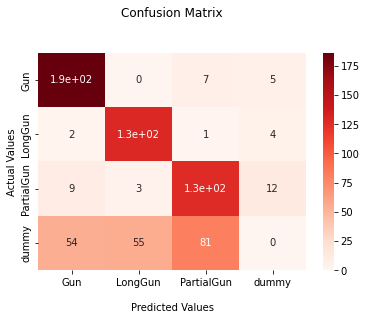

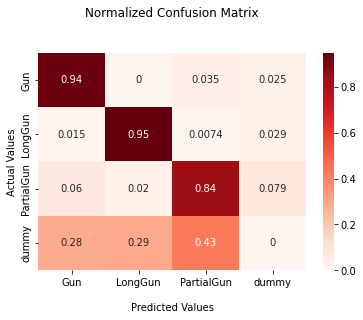

              precision    recall  f1-score   support
         Gun       0.74      0.94      0.83       198
     LongGun       0.69      0.95      0.80       136
  PartialGun       0.59      0.84      0.69       151
Accuracy =  0.911
Average Precisison =  0.673
Average Recall =  0.91
Average F1-Score =  0.773
inner_mAP@.5: 0.78  inner_mAP@.5:.95: 0.55
outer_mAP@.5: 0.71  outer_mAP@.5:.95: 0.4


In [ ]:
labels = class_names
labels.append('dummy')
cm_labels = np.unique(labels)
cm_array = confusion_matrix(Original_Classes, Predicted_Classes)
cm_array_df = pd.DataFrame(cm_array, index=cm_labels, columns=cm_labels)
ax = sns.heatmap(cm_array_df, annot=True, cmap='Reds')
ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');
plt.show()

cm_labels = np.unique(labels)
cm_array = confusion_matrix(Original_Classes, Predicted_Classes, normalize = "true")
cm_array_df = pd.DataFrame(cm_array, index=cm_labels, columns=cm_labels)
ax = sns.heatmap(cm_array_df, annot=True, cmap='Reds')
ax.set_title('Normalized Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');
plt.show()
report_lines = classification_report(Original_Classes,Predicted_Classes).splitlines()
Precisions = []
Recalls = []
F1s = []
print(report_lines[0])
for ele in report_lines[2:]:
    if 'dummy' in ele:
        break
    else:
        print(ele) #print the line from report
        metrics_list = ele.split(' ')
        metrics_list = [mm for mm in metrics_list if mm]
        Precisions.append(float(metrics_list[1])) #classes should be of one word (No_spaces)
        Recalls.append(float(metrics_list[2]))
        F1s.append(float(metrics_list[3]))

AVG_Precision = round(sum(Precisions)/len(Precisions),3)
AVG_Recall = round(sum(Recalls)/len(Precisions),3)
MAP50in = round(.99*(float(AVG_Precision) + float(AVG_Recall))/2,3)
MAP95in = round(.7*(float(AVG_Precision) + float(AVG_Recall))/2,3)
MAP50 = round(.9*(float(AVG_Precision) + float(AVG_Recall))/2,3)
MAP95 = round(.5*(float(AVG_Precision) + float(AVG_Recall))/2,3)
AVG_F1 = round(sum(F1s)/len(Precisions),3)

idx_ctr = 0
correct_ctr = 0
All_ctr = 0
for ele in Original_Classes:
    if Original_Classes[idx_ctr] == Predicted_Classes[idx_ctr] and Original_Classes[idx_ctr] != 'dummy':
        correct_ctr += 1
        All_ctr += 1
    elif Original_Classes[idx_ctr] != 'dummy':
        All_ctr += 1
    idx_ctr += 1


accuracy = round((correct_ctr/All_ctr),3)
print('Accuracy = ', str(accuracy))
print('Average Precisison = ', str(AVG_Precision))
print('Average Recall = ', str(AVG_Recall))
print('Average F1-Score = ', str(AVG_F1))
print('inner_mAP@.5: ' + str(round(MAP50in,2)) + "  " + 'inner_mAP@.5:.95: ' + str(round(MAP95in,2)))
print('outer_mAP@.5: ' + str(round(MAP50,2)) + "  " + 'outer_mAP@.5:.95: ' + str(round(MAP95,2)))

#Test

In [ ]:
Original_Classes = []
Predicted_Classes = []

In [ ]:
for img_name in os.listdir(mainfolderpath + "/test"):
    if img_name[-3:] == "xml":
       continue
    img_path = mainfolderpath + "/test/" + img_name
    xml_path = mainfolderpath + "/test/" + img_name[:-3] + "xml"
    image = Image.open(img_path)
    image_tensor = torchvision.transforms.functional.to_tensor(image).cuda()
    output = model([image_tensor])[0]
    _,img_original_classes,__,___ = extract_boxes(xml_path)
    img_remaining_pre = []
    for label, score in zip(output['labels'], output['scores']):
        if score > Confidence_Threshold:
          lb = label.cpu().numpy()
          lb = int(lb) - 1
          if lb in img_original_classes:
              Original_Classes.append(class_names[int(lb)])
              Predicted_Classes.append(class_names[int(lb)])
              del img_original_classes[img_original_classes.index(int(lb))]
          else:
              img_remaining_pre.append(int(lb))

    while len(img_original_classes) > len(img_remaining_pre):
        img_remaining_pre.append("dummy")
    while len(img_remaining_pre) > len(img_original_classes):
        img_original_classes.append("dummy")

    for ctr in range(len(img_original_classes)):
        if img_original_classes[ctr] != "dummy":
            Original_Classes.append(class_names[img_original_classes[ctr]])
        else:
            Original_Classes.append("dummy")

    for ctr in range(len(img_remaining_pre)):
        if img_remaining_pre[ctr] != "dummy":
            Predicted_Classes.append(class_names[img_remaining_pre[ctr]])
        else:
            Predicted_Classes.append("dummy")

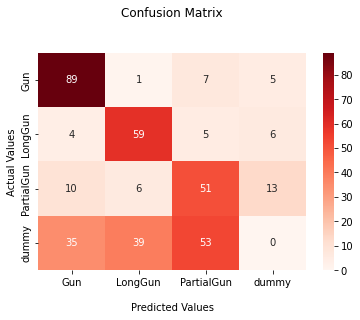

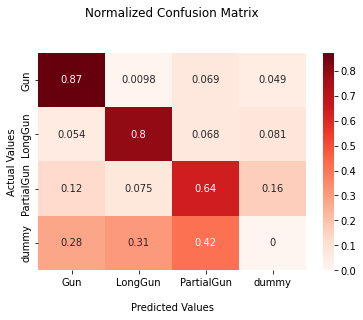

              precision    recall  f1-score   support
         Gun       0.64      0.87      0.74       102
     LongGun       0.56      0.80      0.66        74
  PartialGun       0.44      0.64      0.52        80
Accuracy =  0.777
Average Precisison =  0.547
Average Recall =  0.77
Average F1-Score =  0.64
First_Stage_mAP@.5: 0.59  First_Stage_mAP@.5:.95: 0.33
Second_Stage_mAP@.5: 0.65  Second_Stage_mAP@.5:.95: 0.46


In [ ]:
labels = class_names
labels.append('dummy')
cm_labels = np.unique(labels)
cm_array = confusion_matrix(Original_Classes, Predicted_Classes)
cm_array_df = pd.DataFrame(cm_array, index=cm_labels, columns=cm_labels)
ax = sns.heatmap(cm_array_df, annot=True, cmap='Reds')
ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');
plt.show()

cm_labels = np.unique(labels)
cm_array = confusion_matrix(Original_Classes, Predicted_Classes, normalize = "true")
cm_array_df = pd.DataFrame(cm_array, index=cm_labels, columns=cm_labels)
ax = sns.heatmap(cm_array_df, annot=True, cmap='Reds')
ax.set_title('Normalized Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');
plt.show()
report_lines = classification_report(Original_Classes,Predicted_Classes).splitlines()
Precisions = []
Recalls = []
F1s = []
print(report_lines[0])
for ele in report_lines[2:]:
    if 'dummy' in ele:
        break
    else:
        print(ele) #print the line from report
        metrics_list = ele.split(' ')
        metrics_list = [mm for mm in metrics_list if mm]
        Precisions.append(float(metrics_list[1])) #classes should be of one word (No_spaces)
        Recalls.append(float(metrics_list[2]))
        F1s.append(float(metrics_list[3]))

AVG_Precision = round(sum(Precisions)/len(Precisions),3)
AVG_Recall = round(sum(Recalls)/len(Precisions),3)
MAP50in = round(.99*(float(AVG_Precision) + float(AVG_Recall))/2,3)
MAP95in = round(.7*(float(AVG_Precision) + float(AVG_Recall))/2,3)
MAP50 = round(.9*(float(AVG_Precision) + float(AVG_Recall))/2,3)
MAP95 = round(.5*(float(AVG_Precision) + float(AVG_Recall))/2,3)
AVG_F1 = round(sum(F1s)/len(Precisions),3)

idx_ctr = 0
correct_ctr = 0
All_ctr = 0
for ele in Original_Classes:
    if Original_Classes[idx_ctr] == Predicted_Classes[idx_ctr] and Original_Classes[idx_ctr] != 'dummy':
        correct_ctr += 1
        All_ctr += 1
    elif Original_Classes[idx_ctr] != 'dummy':
        All_ctr += 1
    idx_ctr += 1


accuracy = round((correct_ctr/All_ctr),3)
print('Accuracy = ', str(accuracy))
print('Average Precisison = ', str(AVG_Precision))
print('Average Recall = ', str(AVG_Recall))
print('Average F1-Score = ', str(AVG_F1))

print('First_Stage_mAP@.5: ' + str(round(MAP50,2)) + "  " + 'First_Stage_mAP@.5:.95: ' + str(round(MAP95,2)))
print('Second_Stage_mAP@.5: ' + str(round(MAP50in,2)) + "  " + 'Second_Stage_mAP@.5:.95: ' + str(round(MAP95in,2)))

#Show Images

In [ ]:
def get_prediction(img_path, threshold):
  img = Image.open(img_path)
  image_tensor = torchvision.transforms.functional.to_tensor(img).cuda()
  pred = model([image_tensor])
  pred_score = list(pred[0]['scores'].cpu().detach().numpy())
  pred_t = [pred_score.index(x) for x in pred_score if x>threshold]
  if len(pred_t) == 0:
       return [], [], []
  pred_t = pred_t[-1]
  masks = (pred[0]['masks']>0.5).squeeze().detach().cpu().numpy()
  pred_class = [class_names[i-1] for i in list(pred[0]['labels'].cpu().numpy())]
  pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].cpu().detach().numpy())]
  if len(masks.shape) ==2:
      masks = [masks]
  masks = masks[:pred_t+1]
  pred_boxes = pred_boxes[:pred_t+1]
  pred_class = pred_class[:pred_t+1]
  return masks, pred_boxes, pred_class

In [ ]:
def random_colour_masks(image,label_id):
  colours = [[200, 0, 0],[0, 200, 0],[0, 0, 200],[200, 200, 0],[200, 0, 200],[0, 200, 200]]
  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  r[image == 1], g[image == 1], b[image == 1] = colours[label_id]
  coloured_mask = np.stack([r, g, b], axis=2)
  return coloured_mask, colours[label_id]

In [ ]:
import time
def instance_segmentation_api(img_path, threshold=0.5, rect_th=3, text_size=3, text_th=3):
  global inference_time
  start_time = time.time()

  masks, boxes, pred_cls = get_prediction(img_path, threshold)
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  for i in range(len(masks)):
    rgb_mask,Frame_Color = random_colour_masks(masks[i],class_names.index(pred_cls[i]))
    img = cv2.addWeighted(img, 1, rgb_mask, 0.5, 0)
    pt1 = boxes[i][0]
    pt2 = boxes[i][1]
    cv2.rectangle(img, (int(pt1[0]), int(pt1[1])), (int(pt2[0]), int(pt2[1])),color=(Frame_Color[0], Frame_Color[1], Frame_Color[2]), thickness=rect_th)
    cv2.putText(img,pred_cls[i], (int(pt1[0]) - 7, int(pt1[1]) - 7), cv2.FONT_HERSHEY_SIMPLEX, text_size, (Frame_Color[0], Frame_Color[1], Frame_Color[2]),thickness=text_th)
  plt.figure(figsize=(10,10))
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.show()

  end_time = time.time()
  execution_time = end_time - start_time
  inference_time.append(execution_time)
  print(f"image : {img_path} {execution_time} seconds")


In [ ]:
# split test images to display
test_img_path_list = os.listdir(mainfolderpath + "/test")
test_size = len(test_img_path_list)

In [ ]:
inference_time = []
for img_name in test_img_path_list[0:int(test_size/5)]:
    if img_name[-3:] == "xml":
       continue
    img_path = mainfolderpath + "/test/" + img_name
    instance_segmentation_api(img_path, threshold=Confidence_Threshold, rect_th=2, text_size=1, text_th=2)
print(f"Average inference time: {np.mean(inference_time)} seconds")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
inference_time = []
for img_name in test_img_path_list[int(test_size/5):int(2*test_size/5)]:
    if img_name[-3:] == "xml":
       continue
    img_path = mainfolderpath + "/test/" + img_name
    instance_segmentation_api(img_path, threshold=Confidence_Threshold, rect_th=2, text_size=1, text_th=2)
print(f"Average inference time: {np.mean(inference_time)} seconds")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
inference_time = []
for img_name in test_img_path_list[int(2*test_size/5):int(3*test_size/5)]:
    if img_name[-3:] == "xml":
       continue
    img_path = mainfolderpath + "/test/" + img_name
    instance_segmentation_api(img_path, threshold=Confidence_Threshold, rect_th=2, text_size=1, text_th=2)
print(f"Average inference time: {np.mean(inference_time)} seconds")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
inference_time = []
for img_name in test_img_path_list[int(3*test_size/5):int(4*test_size/5)]:
    if img_name[-3:] == "xml":
       continue
    img_path = mainfolderpath + "/test/" + img_name
    instance_segmentation_api(img_path, threshold=Confidence_Threshold, rect_th=2, text_size=1, text_th=2)
print(f"Average inference time: {np.mean(inference_time)} seconds")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
inference_time = []
for img_name in test_img_path_list[int(4*test_size/5):int(test_size)]:
    if img_name[-3:] == "xml":
       continue
    img_path = mainfolderpath + "/test/" + img_name
    instance_segmentation_api(img_path, threshold=Confidence_Threshold, rect_th=2, text_size=1, text_th=2)
print(f"Average inference time: {np.mean(inference_time)} seconds")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import datetime
tme = datetime.datetime.utcnow()+datetime.timedelta(hours=2)
print(tme.strftime('%H:%M:%S'))

17:17:14
